In [21]:
import mlrose_ky as mlrose
import torch
import pyperch
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.model_selection
from sklearn.model_selection import learning_curve, LearningCurveDisplay, validation_curve, ValidationCurveDisplay
from sklearn.metrics import accuracy_score
from matplotlib.ticker import ScalarFormatter

# Load Data

In [22]:
train_df = pd.read_csv('../datasets/cleaned_data/mkt_camp_v1/train.csv')
target_column = "Response"
y_train = train_df[target_column]
X_train = train_df.drop(columns=[target_column])

test_df = pd.read_csv('../datasets/cleaned_data/mkt_camp_v1/test.csv')
y_test = test_df[target_column]
X_test = test_df.drop(columns=[target_column])

# Hyperparameter Tuning

# RHC

# SA

# GA

In [9]:
nn_model = mlrose.NeuralNetwork(
    hidden_nodes=[256, 256, 256],
    activation='sigmoid',
    algorithm='genetic_alg',   # 'random_hill_climb', 'simulated_annealing', 'genetic_alg', or 'gradient_descent'
    max_iters=5000,
    bias=True,
    is_classifier=True,
    early_stopping=True,
    clip_max=5,
    learning_rate=0.01,
    pop_size=200,
    mutation_prob=0.2,
    curve=True,
    random_state=42
)

In [16]:
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)

y_pred_labels = y_pred.flatten()
accuracy = np.mean(y_pred_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7911


In [20]:
pop_sizes = [50, 100, 200, 500, 1000]

ga_train_pop_size, ga_valid_pop_size = validation_curve(estimator=nn_model, 
                                                        X=X_train,
                                                        y=y_train,
                                                        param_name="pop_size",
                                                        param_range=pop_sizes, 
                                                        cv=5, 
                                                        scoring="accuracy",
                                                        n_jobs=-1)

Text(0.5, 1.0, 'GA: Varying population sizes')

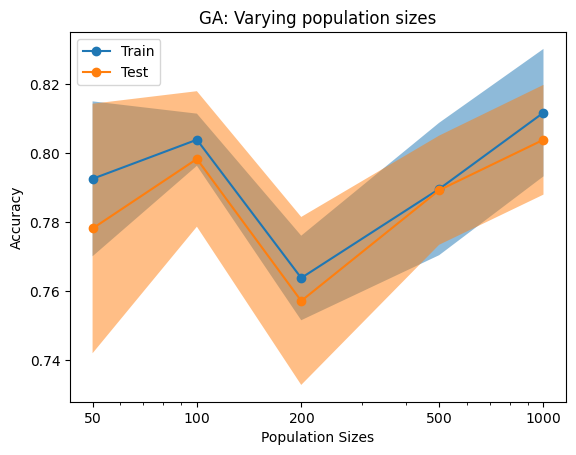

In [32]:
display = ValidationCurveDisplay(param_name='Population Sizes',
                                 param_range=np.array(pop_sizes),
                                 train_scores=ga_train_pop_size,
                                 test_scores=ga_valid_pop_size,
                                 score_name='Accuracy')
param = { "line_kw" : {"marker":"o"}}
display.plot(**param)
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.xticks(ticks=pop_sizes)
plt.title("GA: Varying population sizes")

In [25]:
default_grid_search_parameters = {
    "max_iters": [5000],
    "learning_rate_init": [0.1, 0.2, 0.4, 0.8],
    "hidden_layer_sizes": [[256, 256, 256]],
    "activation": [mlrose.neural.activation.sigmoid],
}

default_parameters = {
    "seed": 42,
    "iteration_list": 2 ** np.arange(13),
    "max_attempts": 5000,
    "override_ctrl_c_handler": False,
    "n_jobs": 5,
    "cv": 5,
}

skmlp_grid_search_parameters = {
    **default_grid_search_parameters,
    "max_iters": [5000],
    "learning_rate_init": [0.0001],
    "activation": [mlrose.neural.activation.sigmoid],
}

skmlp_default_parameters = {**default_parameters, "early_stopping": True, "tol": 1e-05, "alpha": 0.001, "solver": "lbfgs"}

cx_skr = mlrose.SKMLPRunner(
    x_train=X_train,
    y_train=y_train,
    x_test=X_test,
    y_test=y_test,
    experiment_name="skmlp_clean",
    grid_search_parameters=skmlp_grid_search_parameters,
    **skmlp_default_parameters,
)

run_stats_df, curves_df, cv_results_df, cx_sr = cx_skr.run()

Fitting 5 folds for each of 1 candidates, totalling 5 fits


# Learning curve

# Loss curve

# Test Set Performance